In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Load the dataset

data = pd.read_csv(
    "/content/IMDB Dataset.csv",
    engine='python',
    on_bad_lines='skip'  # Skip rows with format issues
)


# Preprocessing the data

In [ ]:
data.replace({"sentiment":{"positive":1,"negative":0}},inplace=True)

/tmp/ipython-input-3877186056.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment":{"positive":1,"negative":0}},inplace=True)


In [ ]:
# removing duplicates

# print(data.duplicated().sum() + "duplicates in dataset")
data.drop_duplicates(inplace=True)

0


In [ ]:
data['review']=data['review'].str.lower()

In [ ]:
# Remove HTML tags from reviews
import re
def remove_html_tags(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern,'',text)
    return text
data['review'] = data['review'].apply(remove_html_tags)

In [ ]:
# Remove stopwords from reviews
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Intilize Stopwords
stop_words = set(stopwords.words('english'))

data['review'] = data['review'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stop_words)]))

# Remove URLs from reviews
data['review'] = data['review'].str.replace(r'http\S+|www\.\S+', '', case=False, regex=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Split data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Tokenizing

In [ ]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [ ]:
# target variables
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

# LSTM model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=5000,output_dim=128, input_shape=(200,)))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 673ms/step - accuracy: 0.5405 - loss: 0.6898 - val_accuracy: 0.7054 - val_loss: 0.6634
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 679ms/step - accuracy: 0.8415 - loss: 0.5847 - val_accuracy: 0.7881 - val_loss: 0.4801
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 705ms/step - accuracy: 0.9087 - loss: 0.2631 - val_accuracy: 0.7907 - val_loss: 0.4469
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 646ms/step - accuracy: 0.9487 - loss: 0.1715 - val_accuracy: 0.8010 - val_loss: 0.4875
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 693ms/step - accuracy: 0.9820 - loss: 0.0678 - val_accuracy: 0.7855 - val_loss: 0.4964


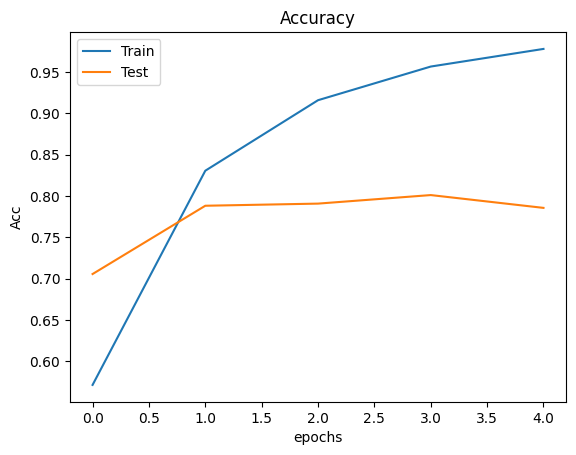

In [ ]:
# Plot training and validation accuracy
plt.figure()
plt.plot(history.history["accuracy"], label = "Train")
plt.plot(history.history["val_accuracy"], label = "Test")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8250 - loss: 0.4284
Test Loss: 0.5136370658874512
Test Accuracy: 0.7871900796890259


# Logistic Regression

In [ ]:
# Import libraries for Logistic Regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Prepare data for Logistic Regression
A = data['review']
B = data['sentiment']

In [ ]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(A,B, test_size=0.2, random_state=42)

In [ ]:
# Transform text data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # Limit to 5000 features for simplicity
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500)  # Increase max_iter if convergence issues occur
log_reg.fit(X_train_tfidf, Y_train)

LogisticRegression(max_iter=500)

In [ ]:
# Make Predictions
y_pred = log_reg.predict(X_test_tfidf)

# Evaluate Logistic Regression model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.86


In [ ]:
# Import pickle to save models
import pickle

In [ ]:
# Save tokenizer
pickle.dump(tokenizer ,open('tokenizer.pkl' , 'wb'))

In [ ]:
# Save LSTM model
pickle.dump(model ,open('model.pkl' , 'wb'))